# Reconstructing the Logistic Map

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
import numba as nb
from matplotlib import pyplot as plt

In [2]:
x_n, a = sp.symbols('x_n a')
x_n_plus1 = sp.Function('x_{n+1}')(x_n)
quadratic_map_symbolic = sp.Eq(x_n_plus1, a * x_n * (1 - x_n))
quadratic_map_symbolic

Eq(x_{n+1}(x_n), a*x_n*(1 - x_n))

In [3]:
@nb.njit()
def quadratic_map_expression(x, a):
    return a * x * (1 - x)

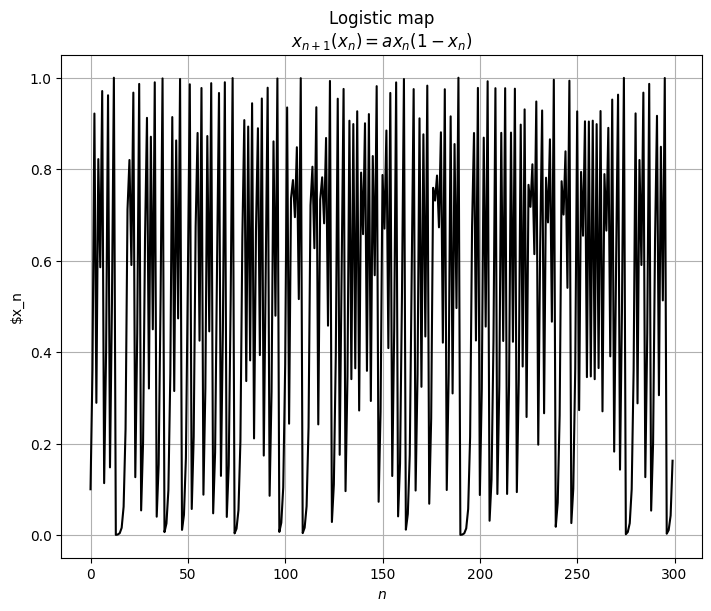

In [4]:
x_0, n, a_val = 0.1, 300, 4.0
n_values = np.arange(n)
quadratic_map = logistic_map(x_0, n, quadratic_map_expression, a_val)
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(n_values, quadratic_map, color='black')
axes.grid()
_=axes.set(xlabel=f'$n$', ylabel=f'${x_n}', title=f'Logistic map\n${sp.latex(quadratic_map_symbolic)}$')

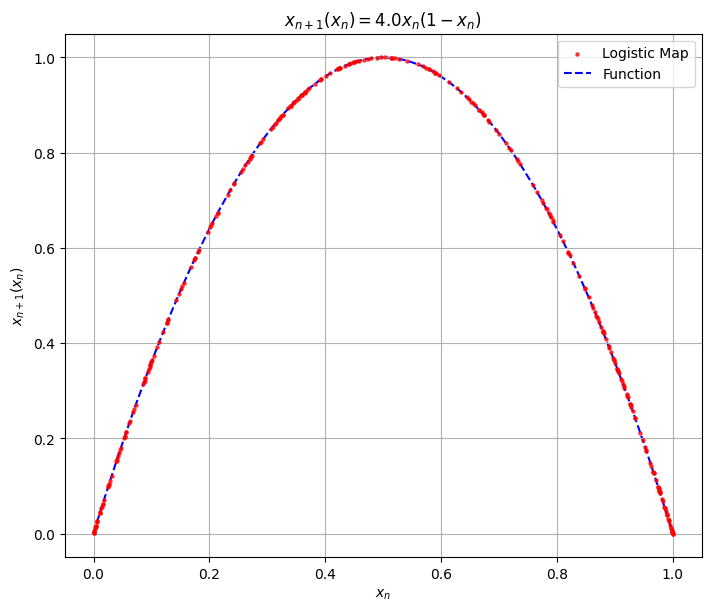

In [5]:
quadratic_map_sorted = np.sort(quadratic_map)
quadratic_map_function = sp.lambdify(x_n, quadratic_map_symbolic.rhs.subs(a, a_val), 'numpy')(quadratic_map_sorted)
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.scatter(quadratic_map[:-1], quadratic_map[1:], color='red', zorder=2, label='Logistic Map', alpha=0.7, s=5)
axes.plot(quadratic_map_sorted, quadratic_map_function, zorder=1, color='blue', label='Function', linestyle='--')
axes.grid()
axes.legend()
_=axes.set(xlabel=f'${x_n}$', ylabel=f'${x_n_plus1}$', 
           title=f'${sp.latex(quadratic_map_symbolic.subs(a, a_val))}$')

# Reconstructing Random Data

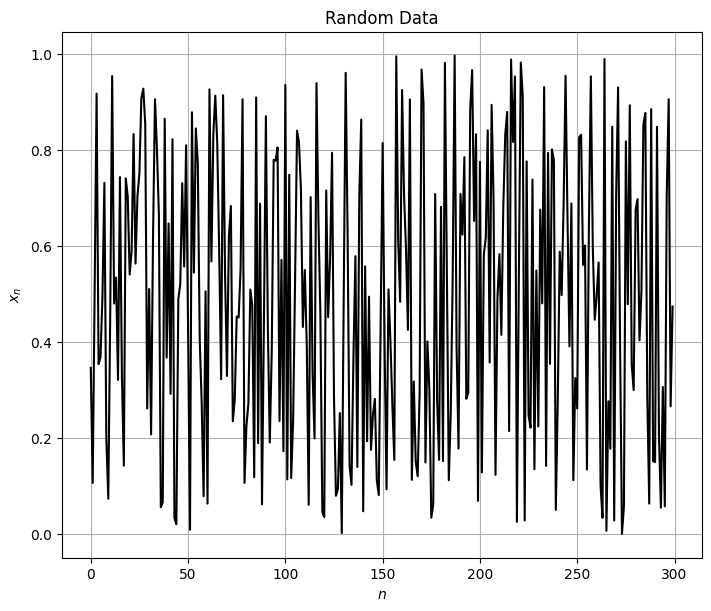

In [6]:
random_data = np.random.random(n)
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(n_values, random_data, color='black')
axes.grid()
_=axes.set(xlabel=f'$n$', ylabel=f'${x_n}$', title=f'Random Data')

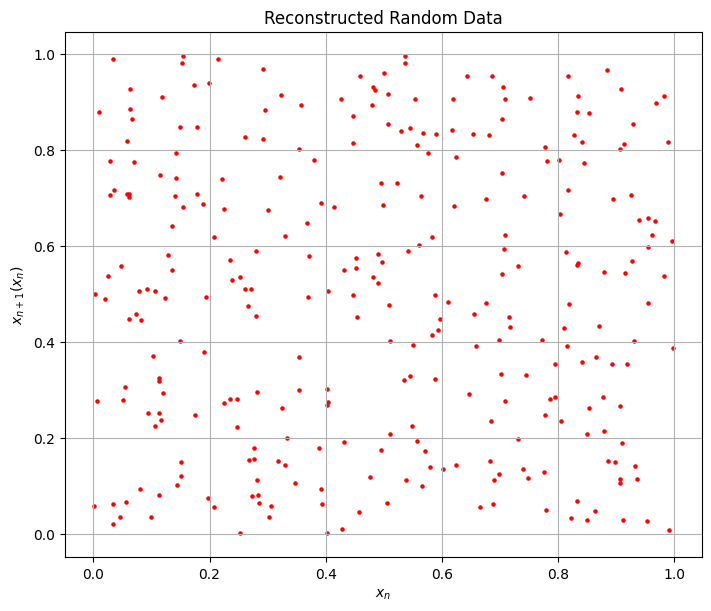

In [7]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.scatter(random_data[:-1], random_data[1:], color='red', marker='o', s=5)
axes.grid()
_=axes.set(xlabel=f'${x_n}$', ylabel=f'${x_n_plus1}$', 
           title=f'Reconstructed Random Data')

# Reconstructing Lorenz's attractor